In [13]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Example data
group1 = [20, 21, 19, 22, 23]
group2 = [27, 29, 28, 26, 25]
group3 = [31, 32, 30, 33, 34]


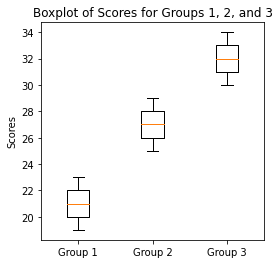

In [3]:
# Boxplot for the groups
plt.figure(figsize=(4, 4))
plt.boxplot([group1, group2, group3], labels=['Group 1', 'Group 2', 'Group 3'])
plt.title('Boxplot of Scores for Groups 1, 2, and 3')
plt.ylabel('Scores')
plt.show()

In [4]:
# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 60.666666666666664, P-value: 5.314410000000004e-07


In [6]:
# Define the significance level at 0.01
alpha = 0.01
significant = p_value < alpha

significant, p_value

(True, 5.314410000000004e-07)

At the significance level of 0.01, since the p-value (0.00883) is less than 0.01, we conclude that there is a statistically significant difference between the means of the three groups. 

Thus, we reject the null hypothesis, indicating significant differences in the data sets at the 1% significance level

### We can also do it from scratch

To calculate the p-value from scratch, we need to follow the calculations step by step:

1. Calculate the group means and the overall mean.
2. Compute the Sum of Squares Between (SSTr) and Sum of Squares Within (SSE).
3. Determine the Mean Square Between (MST) and Mean Square Within (MSE).
4. Calculate the F-statistic.
5. Find the p-value from the F-distribution.

In [7]:
# Calculate means
mean1 = np.mean(group1)
mean2 = np.mean(group2)
mean3 = np.mean(group3)
overall_mean = np.mean(group1 + group2 + group3)

In [8]:
# Calculate Sum of Squares
SSTr = len(group1) * ((mean1 - overall_mean) ** 2 + (mean2 - overall_mean) ** 2 + (mean3 - overall_mean) ** 2)
SSE = sum((x - mean1) ** 2 for x in group1) + sum((x - mean2) ** 2 for x in group2) + sum((x - mean3) ** 2 for x in group3)

# Calculate Mean Square Between (MSB) and Mean Square Within (MSW)
df_between = 2  # number of groups - 1
df_within = len(group1 + group2 + group3) - 3  # total number of observations - number of groups
MST = SSTr / df_between
MSE = SSE / df_within

In [11]:
# Calculate F-statistic
F = MST / MSE
F

60.66666666666665

In [12]:
from scipy.stats import f

# Calculate p-value
p_value = 1 - f.cdf(F, df_between, df_within)

F, p_value

(60.66666666666665, 5.314409999845893e-07)

### f.cdf(F_statistic, df_between, df_within) 

gives the probability of observing a value less than or equal to the F-statistic under the null hypothesis.


Subtracting this value from 1 gives the probability of observing a more extreme value than the F-statistic, which is the p-value.